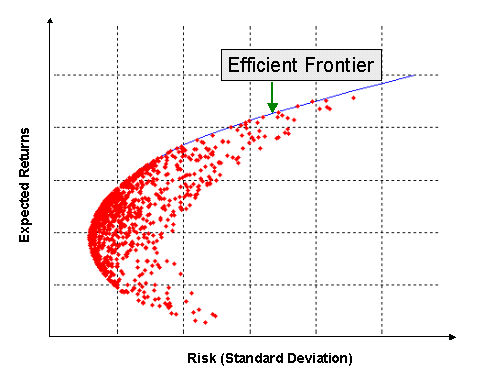

In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
import datetime
import seaborn as sns

# Download and manipulate the Data 

In [2]:
# Downloading assets data using yfinance library

Assets = ['GE','IBM','AAPL','TSLA','JPM'] # You can modifie this liste and add what ever assets you want 
end = datetime.date.today()
start = end - datetime.timedelta(360*10) # daily returns over 10 years
df = yf.download(Assets, start = start , end = end )
df = df['Adj Close']
df.tail()

[*********************100%***********************]  5 of 5 completed


,AAPL,GE,IBM,JPM,TSLA
Date,,,,,
2023-08-04,181.990005,113.059998,142.599014,156.020004,253.860001
2023-08-07,178.850006,114.730003,144.516922,156.759995,251.449997
2023-08-08,179.800003,113.550003,144.250000,155.880005,249.699997
2023-08-09,178.190002,112.169998,142.490005,153.789993,242.190002
2023-08-10,177.970001,113.570000,143.250000,153.559998,245.339996


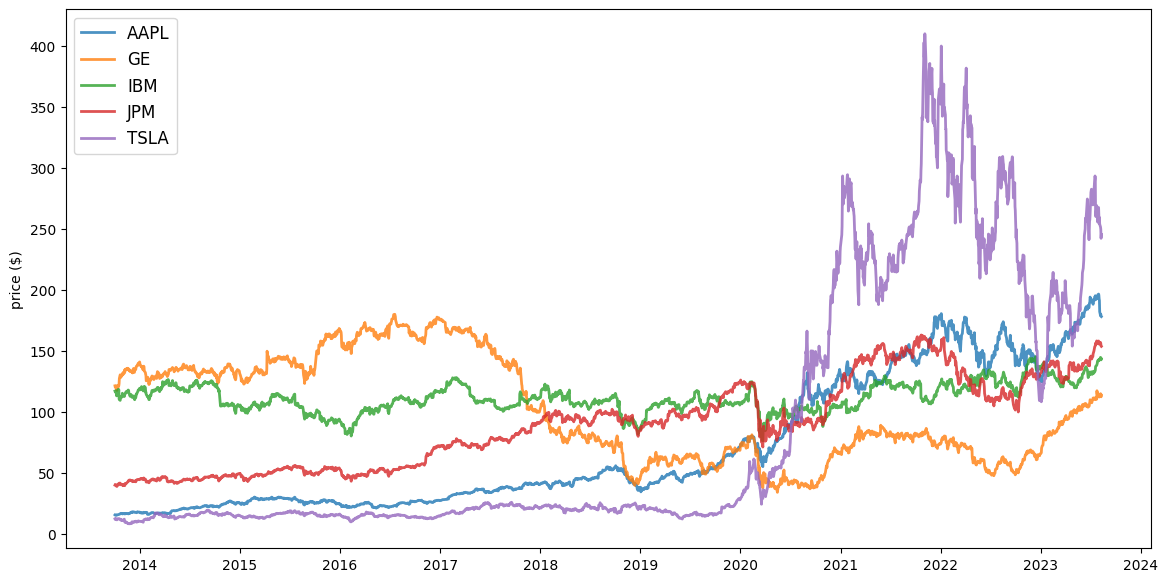

In [3]:
plt.figure(figsize=(14, 7))
for i in df.columns.values:
    plt.plot(df.index, df[i], lw=2, alpha=0.8,label=i)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price ($)')
plt.show()

In [4]:
# Calculate the daily returns

df = df.pct_change().dropna()
df

,AAPL,GE,IBM,JPM,TSLA
Date,,,,,
2013-10-03,-0.012562,-0.009453,-0.005947,-0.002880,-0.042222
2013-10-04,-0.000786,-0.002075,0.001306,0.014055,0.044256
2013-10-07,0.009772,-0.004574,-0.011353,-0.015948,0.011548
2013-10-08,-0.013962,-0.011278,-0.018076,-0.018522,-0.045556
2013-10-09,0.011747,-0.004225,0.014548,-0.002359,-0.034053
...,...,...,...,...,...
2023-08-04,-0.048020,0.006230,-0.001454,-0.002111,-0.021055
2023-08-07,-0.017254,0.014771,0.013450,0.004743,-0.009493
2023-08-08,0.005312,-0.010285,-0.001847,-0.005614,-0.006960


# Calculate the statistics 

In [5]:
# calculate the expected returns which is the averege of returns
expRet = np.array(df.mean())
N = len(df)
# calculate the standard diviation
stdDev = np.array(np.std(df))
# calculate the Sharp Ratio
sharp = expRet/stdDev
expRet, stdDev,N, sharp

(array([0.00115164, 0.00020321, 0.00019201, 0.00069143, 0.00184339]),
 array([0.01795149, 0.02142633, 0.01478968, 0.0170925 , 0.03548025]),
 2480,
 array([0.06415301, 0.00948419, 0.01298271, 0.04045249, 0.0519555 ]))

In [6]:
# variance covariance Matrix
varCov = np.matmul(np.array(df).T, np.array(df))/(N-1)
varCov

array([[0.00032371, 0.0001307 , 0.00010774, 0.00013494, 0.00026601],
       [0.0001307 , 0.00045931, 0.00014674, 0.000206  , 0.00016835],
       [0.00010774, 0.00014674, 0.00021886, 0.00013894, 0.00010818],
       [0.00013494, 0.000206  , 0.00013894, 0.00029275, 0.00015768],
       [0.00026601, 0.00016835, 0.00010818, 0.00015768, 0.00126276]])

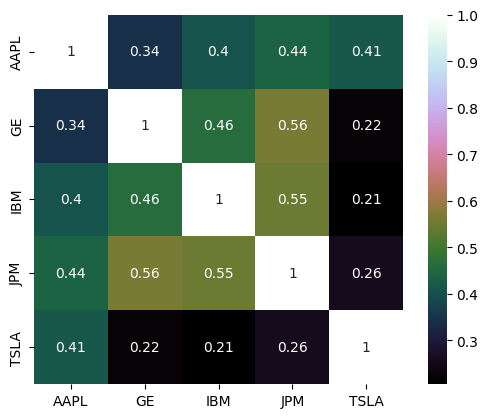

In [7]:
# calculate and plot the correlation between assets
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

# Constructe the equaly wieghted portfolio

In [8]:
# calculate the wieghts 
wieghts = np.array(len(df.columns) * [1/len(df.columns)])
wieghts

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [9]:
# calculate portfolio's expected return
portfolio_expRet = np.dot(expRet,wieghts)
portfolio_expRet

0.0008163383128823138

In [10]:
# calculate portfolio's stdDev
portfolio_stdDev = np.sqrt(np.matmul(np.matmul(wieghts,varCov),wieghts.T))
portfolio_stdDev

0.015083679225560769

In [11]:
# calculate portfolio Sharp Ratio
portfolio_sharp = portfolio_expRet / portfolio_stdDev
portfolio_sharp

0.05412063599834109

# Efficient Frontiers

In [12]:
# Generating random portfolio wieghts
rand_expRet = []
rand_stdDev = []
rand_wieghts = []
for i in range(10000): # we goes with 10000 random portfolio 
    coefs = np.random.rand(len(df.columns))
    total = np.sum(coefs)
    wieghts = coefs/total
    # adding the wieghts,expected returns and std deviation to lists 
    rand_wieghts.append(wieghts)
    rand_expRet.append(np.dot(expRet,wieghts))
    rand_stdDev.append(np.sqrt(np.matmul(np.matmul(wieghts,varCov),wieghts.T)))

In [13]:
len(rand_expRet)

10000

In [14]:
# Create a Pandas dataframe with the calculated data
data = pd.DataFrame()
data['wieghts']=rand_wieghts
data['return']=rand_expRet
data['std']=rand_stdDev
data['sharp'] = data['return']/data['std']
max_sharp = data[data['sharp']==max(data['sharp'])]
data.head()

,wieghts,return,std,sharp
0,"[0.13123501177928382, 0.13849064224341823, 0.1...",0.000889,0.015929,0.055788
1,"[0.2681215834780879, 0.23449529844520947, 0.08...",0.000672,0.014323,0.046901
2,"[0.15221415782203615, 0.560246631585226, 0.133...",0.000544,0.016348,0.033273
3,"[0.16303222107768423, 0.27120251580928756, 0.0...",0.000885,0.016374,0.054077
4,"[0.10918813078623507, 0.2930694075436516, 0.05...",0.000880,0.016888,0.052121


In [15]:
# market capital line 
MCL = pd.DataFrame()
riskFree = 0.04 / 252
ret = float(max_sharp['return'])
std = float(max_sharp['std'])
MCL['wieghts'] = [0,1,2]
MCL['return'] = (MCL['wieghts'] * ret)+((1-MCL['wieghts'])*riskFree)
MCL['std'] = MCL['wieghts'] * std
MCL

,wieghts,return,std
0,0,0.000159,0.000000
1,1,0.001185,0.016908
2,2,0.002211,0.033815


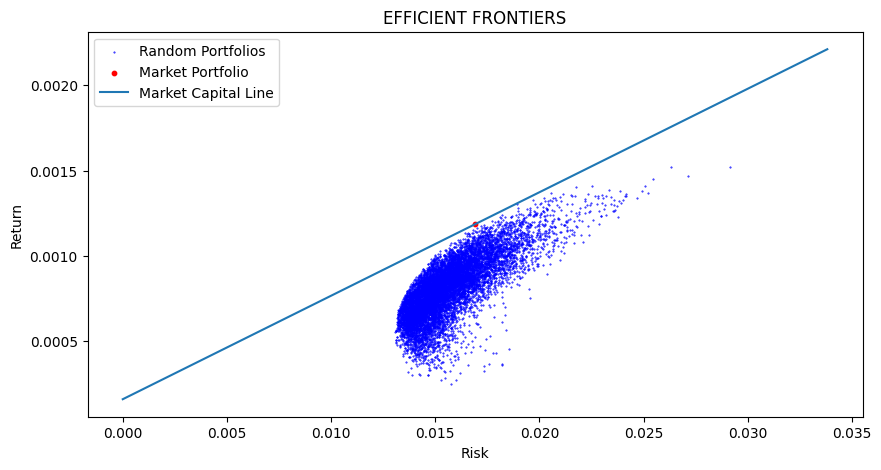

In [20]:
# Ploting all portfolios expected return and standard deviation to get the efficient frontiers 
fig, ax = plt.subplots(figsize=(10, 5))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.title('EFFICIENT FRONTIERS')
random = plt.scatter(data['std'], data['return'], c='b',s=.2)
# the portfolio with max sharp ratio
maxsharp = plt.scatter(max_sharp['std'], max_sharp['return'], c='r',s=10) 
# Market capital line
plt.plot(MCL['std'],MCL['return'])

ax.legend(['Random Portfolios','Market Portfolio','Market Capital Line'])
plt.show()

In [17]:
# Get th wieghts of the Market Portfolio 
for wieght in max_sharp['wieghts']:
    print(wieght)
print(df.columns)

[0.56524898 0.01095311 0.01198155 0.1992763  0.21254006]
Index(['AAPL', 'GE', 'IBM', 'JPM', 'TSLA'], dtype='object')
